<a href="https://colab.research.google.com/github/Suketh610/SkinCancerClassification/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skin cancer classification
---
Part 1 : Performance analysis of keras pretrained models over MNIST: HAM10000 dataset

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import PIL
import os
import cv2

Step 1 : Import the dataset from kaggle

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sukethk","key":"b8e4d1b1ba7da20b149639cc2cf652e7"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

100% 5.19G/5.20G [01:56<00:00, 41.9MB/s]
100% 5.20G/5.20G [01:56<00:00, 48.0MB/s]


In [ ]:
!unzip /content/skin-cancer-mnist-ham10000.zip

Data preprocessing :

In [ ]:
import pandas as pd

df = pd.read_csv('/content/HAM10000_metadata.csv')
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [ ]:
for col in df:
  if col != 'lesion_id' and col != 'image_id':
    print(f'{col} : {df[col].unique()}')

dx : ['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']
dx_type : ['histo' 'consensus' 'confocal' 'follow_up']
age : [80. 75. 60. 70. 55. 85. 65. 40. 50. 45. 35.  0. 30. nan  5. 25. 20. 10.
 15.]
sex : ['male' 'female' 'unknown']
localization : ['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']


In [ ]:
classCount = df['dx'].value_counts()
classCount

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

([<matplotlib.patches.Wedge at 0x7f586d316110>,
 [Text(-0.5584449921517871, 0.9477020580016647, 'nv'),
  Text(-0.1716518532393207, -1.0865245700302901, 'mel'),
  Text(0.5628980664574734, -0.9450638956062377, 'bkl'),
  Text(0.9504061364471251, -0.5538304576345081, 'bcc'),
  Text(1.061943212107254, -0.2868390040760285, 'akiec'),
  Text(1.0925191098670717, -0.12807027201994092, 'vasc'),
  Text(1.0992843374552814, -0.039672981051378356, 'df')])

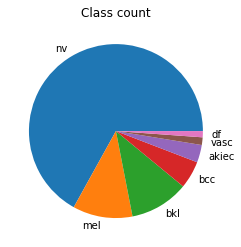

In [ ]:
plt.title('Class count')

plt.pie(classCount, labels = ['nv','mel','bkl','bcc','akiec','vasc','df'])

Age vs Melanoma (Cacer) :



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


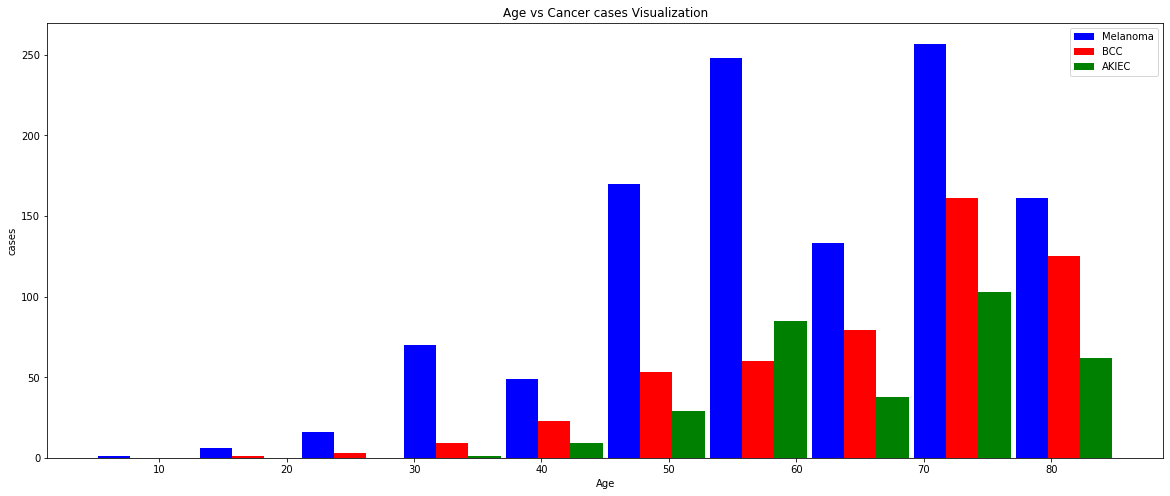

In [ ]:
melanoma_count = df[df.dx=='mel'].age
bcc_count = df[df.dx=='bcc'].age
akiec_count = df[df.dx=='akiec'].age

plt.figure(figsize=(20,8))
plt.xlabel('Age')
plt.ylabel('cases')
plt.title('Age vs Cancer cases Visualization')

plt.hist([melanoma_count, bcc_count, akiec_count], color=['blue','red','green'], rwidth=0.95, label=['Melanoma', 'BCC', 'AKIEC'])
plt.legend()